In [1]:
import sys

sys.path.append("../src/")

import importlib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lib
import p3inn
import plotting

importlib.reload(lib)
importlib.reload(p3inn)

<module 'p3inn' from '/Users/r/Documents/stud/ss24/finnpinn/paper/../src/p3inn/__init__.py'>

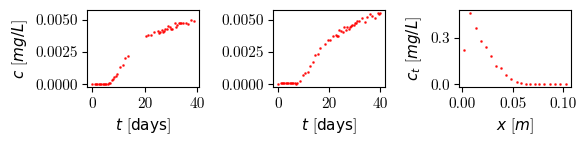

In [2]:
fig, axs = plt.subplots(ncols=3, figsize=(2*plotting.FIGURE_WIDTH, 0.85*plotting.FIGURE_HEIGHT))

for ax, core in zip(axs, ["1", "2", "2B"]):
    ax.scatter(*lib.load_exp_data_numpy(f"Core {core}"), color="red", alpha=0.8, s=0.8)
    plotting.set_concentration_axes_stuff(ax, set_xlabel=True, set_ylabel=core!="2", core=core)
axs[0].sharey(axs[1])
# axs[1].set_yticklabels([])
# axs[1].tick_params(axis='y', which='both', labelleft=False)
# plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plotting.savefig(fig, "figs/core_data")
plt.show()

In [3]:
finn_out_path = Path("../data_out/finn/")
finn_root = finn_out_path / "p3inn_core2_new_multiprocessing"

btc_dataspan_quantiles = dict()
for p in finn_root.iterdir():
    finn_dir = lib.FinnDir(p)
    q_ = float(p.name.split("_")[-1])
    if "up" in p.name:
        q = 0.5 + q_ / 2
    elif "down" in p.name:
        q = 0.5 - q_ / 2
    else:
        raise RuntimeError()
    btc_dataspan_quantiles[f"{q:g}"] = (
        np.load(finn_dir.t_train_path),
        np.load(finn_dir.c_train_path),
    )

In [4]:
np.array(sorted(btc_dataspan_quantiles.keys(), key=float))

array(['0', '0.025', '0.0375', '0.05', '0.0625', '0.075', '0.0875', '0.1',
       '0.1125', '0.125', '0.1375', '0.15', '0.1625', '0.175', '0.1875',
       '0.2', '0.2125', '0.225', '0.2375', '0.25', '0.2625', '0.275',
       '0.2875', '0.3', '0.3125', '0.325', '0.3375', '0.35', '0.3625',
       '0.375', '0.3875', '0.4', '0.4125', '0.425', '0.4375', '0.45',
       '0.475', '0.5', '0.525', '0.55', '0.5625', '0.575', '0.5875',
       '0.6', '0.6125', '0.625', '0.6375', '0.65', '0.6625', '0.675',
       '0.6875', '0.7', '0.7125', '0.725', '0.7375', '0.75', '0.7625',
       '0.775', '0.7875', '0.8', '0.8125', '0.825', '0.8375', '0.85',
       '0.8625', '0.875', '0.8875', '0.9', '0.9125', '0.925', '0.9375',
       '0.95', '0.9625', '0.975', '1'], dtype='<U6')

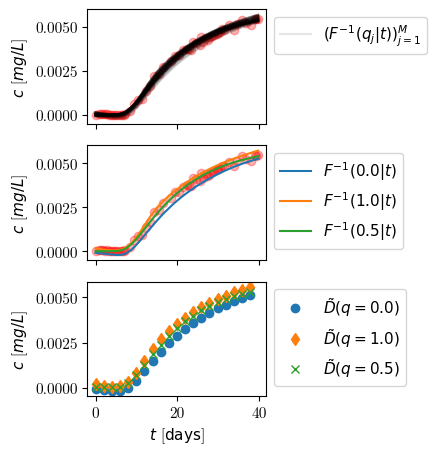

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(1.5*plotting.FIGURE_WIDTH, 2.5*plotting.FIGURE_HEIGHT))

axs[0].scatter(*lib.load_exp_data_numpy("Core 2"), color="red", alpha=0.3)
for k, v in btc_dataspan_quantiles.items():
    axs[0].plot(
        *v,
        color="k",
        alpha=0.1,
        label="$(F^{-1}(q_j | t))_{j=1}^{M}$" if k == "0" else "",
    )

axs[1].scatter(*lib.load_exp_data_numpy("Core 2"), color="red", alpha=0.3)
axs[1].plot(*btc_dataspan_quantiles["0"], label="$F^{-1}(0.0 | t)$")
axs[1].plot(*btc_dataspan_quantiles["1"], label="$F^{-1}(1.0 | t)$")
axs[1].plot(*btc_dataspan_quantiles["0.475"], label="$F^{-1}(0.5 | t)$")


def skipper(x_y):
    x, y = x_y
    return x[::50], y[::50]


axs[2].plot(*skipper(btc_dataspan_quantiles["0"]), "o", label="$\\tilde{D}(q=0.0)$")
axs[2].plot(*skipper(btc_dataspan_quantiles["1"]), "d", label="$\\tilde{D}(q=1.0)$")
axs[2].plot(*skipper(btc_dataspan_quantiles["0.475"]), "x", label="$\\tilde{D}(q=0.5)$")
axs[2].set_xlabel("$t$")

for ax in axs:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[0].sharex(axs[1])
axs[1].sharex(axs[2])
axs[0].tick_params(axis='x', which='both', labelbottom=False)
axs[1].tick_params(axis='x', which='both', labelbottom=False)
for i, ax in enumerate(axs):
    plotting.set_concentration_axes_stuff(ax, set_xlabel=i==2, set_ylabel=True)

plt.tight_layout()
plotting.savefig(fig, "figs/btc_dataspan_quantiles")
plt.show()

# Runtime

Epoch 001/100 took 18.67 seconds.               Average epoch training error: (+)5.7667608261
Epoch 002/100 took 21.43 seconds.               Average epoch training error: (+)1.244322896 
Epoch 003/100 took 24.35 seconds.               Average epoch training error: (+)0.6885731816
Epoch 004/100 took 23.77 seconds.               Average epoch training error: (+)0.5448763371
Epoch 005/100 took 24.71 seconds.               Average epoch training error: (+)0.4544454515
Epoch 006/100 took 28.63 seconds.               Average epoch training error: (+)0.43822065  
Epoch 007/100 took 28.43 seconds.               Average epoch training error: (+)0.4325345457

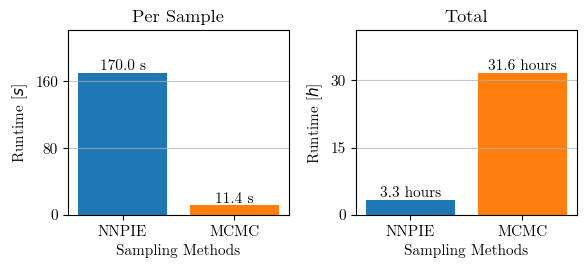

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotting

# Data
methods_per_sample = ["NNPIE", "MCMC"]
runtimes_per_sample = [
    sum([18.67, 21.43, 24.35, 23.77, 24.71, 28.63, 28.43]),
    22.75319/2,
]

methods_total = ["NNPIE", "MCMC"]
runtimes_total = [
    70*sum([18.67, 21.43, 24.35, 23.77, 24.71, 28.63, 28.43])/60/60,
    10_000*22.75319/2/60/60,
]

# Create a figure and two axes side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(plotting.FIGURE_WIDTH * 2.0, 1.5*plotting.FIGURE_HEIGHT)) # Wider figure

# Plot for per-sample runtime
colors_per_sample = ['C0', 'C1']
bars1 = ax1.bar(x=methods_per_sample, height=runtimes_per_sample, color=colors_per_sample)
for bar, runtime in zip(bars1, runtimes_per_sample):
    ax1.annotate(
        f"{runtime:.1f} s",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="bottom",
    )
ax1.set_ylabel("Runtime [$s$]")
ax1.set_xlabel("Sampling Methods")
ax1.set_ylim(0, max(runtimes_per_sample) * 1.3)
ax1.grid(axis='x', linestyle='', alpha=0.7)
ax1.grid(axis='y', linestyle='-', alpha=0.7)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax1.set_title("Per Sample")



# Plot for total runtime
colors_total = ['C0', 'C1']
bars2 = ax2.bar(x=methods_total, height=runtimes_total, color=colors_total)
for bar, runtime in zip(bars2, runtimes_total):
    ax2.annotate(
        f"{runtime:.1f} hours",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="bottom",
    )

ax2.set_ylabel("Runtime [$h$]")
ax2.set_xlabel("Sampling Methods")
ax2.set_ylim(0, max(runtimes_total) * 1.3)
ax2.grid(axis='x', linestyle='', alpha=0.7)
ax2.grid(axis='y', linestyle='-', alpha=0.7)
ax2.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax2.set_title("Total")


plt.tight_layout()
plotting.savefig(fig, "figs/runtime_comparison")
plt.show()